# Medical appointment analysis

- 데이터 출처 : <a href='https://www.kaggle.com/joniarroba/noshowappointments'>Kaggle</a>
- 데이터 종류 : 환자가 의사에게 진단을 받고 향후 추가적인 진료 일정을 잡았을 때, 향후 진료를 받으러 오는지 안오는지에 대한 데이터, 그리고 개별 환자들에 대한 개인특성 데이터도 포함되어 있음
- 데이터에서 정의하는 문제 상황 : 환자들의 30%가 향후 진료를 위해 방문하지 않는다는 문제 제시

- 문제상황 : 'A'라는 병원과 제휴를 맺은 IT솔루션 기반 헬스케어 기업은 A병원으로 부터 환자들의 높은 진료 이탈율을 문제로 제시했다. 그리고 이러한 진료 이탈의 원인이 무엇인지 파악해달라는 요청으로 데이터 부서에게 업무가 주어진 상태

- 문제정의 : A병원 환자들의 중도 진료 이탈의 원인을 찾음으로써 A병원의 수익 최적화에 기여하기 위함.


- 가설설정

    * ``여성일수록 향후 진료예약에 더 많이 참여할 것이다.``
        - 왜냐하면 여성이 남성보다 건강에 더 민감한 경향이 있기 때문이다.
         
    * ``향후 진료예약을 등록한 날(time)부터 진료예약 방문날까지 시간이 짧을수록 향후 진료에 참여율이 더 높을 것이다.``
        - 왜냐하면 시간이 오래될수록 예약한 진료에 대한 기억이 희미해질 것이기 때문이다.
    * ``SMS 문자를 많이 받은 환자일 수록 향후 예약진료에 참여할 가능성이 높을 것이다.``
        - SMS 문자가 리마인드 기능을 할 것으로 예상
    * ``개인의 나이, 병원과의 거리, 학력, 질병들과 향후 진료 참석 여부간의 상관관계 살펴보기``
        - 나이는 많을수록, 질병에 걸려있을 수록 향후 예약진료에 참여할 가능성이 높을 것이다.
    

## Data field

- 01 - PatientId: Identification of a patient
- 02 - AppointmentID: Identification of each appointment
- 03 - Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- 04 - DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
- 05 - DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.
- 06 - Age: How old is the patient.
- 07 - Neighbourhood: Where the appointment takes place.
- 08 - Scholarship: True of False . Observation, this is a broad topic, consider reading this article 
- 09 - Hipertension: True or False
- 10 - Diabetes: True or False
- 11 - Alcoholism: True or False
- 12 - Handcap: True or False
- 13 - SMS_received: 1 or more messages sent to the patient.
- 14 - No-show: True or False.``(Target Variable)``


## Data cleansing

In [96]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data')

In [97]:
medical = pd.read_csv('KaggleV2-May-2016.csv', encoding='utf-8')
medical.shape

(110527, 14)

In [98]:
#결측치 확인하기 -> 깨끗하다!
medical.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [99]:
#결측치가 공백으로 되어있는건 아닌지 dtype을 보고 분명히 수치형 변수이어야 하는데 object타입으로 되어 있는지 보기
medical.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [100]:
# 데이터 미리보기
medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [101]:
# 중복 데이터 여부 확인하기 -> 모두 unique한 데이터들
medical.duplicated().sum()

0

In [102]:
# 2번 이상 기록된 환자들 있는지 PatientID로 찾아보기
# df[df.duplicated()] => 중복된 행들 중 최초의 행을 제외한 나머지 행들 모두 출력함!
medical[medical['PatientId'].duplicated()].head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes


In [103]:
# 주어진 가설들을 검정하기 위해서 개별 환자들이 누군지는 중요하지 않기 때문에
# PatientId는 삭제하자
medical = medical.drop('PatientId', axis=1)

In [104]:
# AppointmentID는 중복여부 확인하기 -> 진료 ID에 대해서 중복된 건수는 없다.
medical['AppointmentID'].duplicated().sum()

0

In [105]:
# AppointmentID도 삭제하자
del medical['AppointmentID']

In [106]:
# ScheduleDay(실제 병원을 방문한 날)와 AppointmentDay(진료 예약을한 날)을 날짜형으로 바꿔주자
medical['ScheduledDay'] = pd.to_datetime(medical['ScheduledDay'], format='%Y-%m-%d')
medical['AppointmentDay'] = pd.to_datetime(medical['AppointmentDay'], format='%Y-%m-%d')

medical['ScheduledDay'] = medical['ScheduledDay'].dt.date
medical['AppointmentDay'] = medical['AppointmentDay'].dt.date

In [107]:
# 예약날짜, 방문날짜로 파생변수 생성
# date_diff : '방문한날짜 - 진료예약한날짜' 로 파생변수 생성
def create_date_diff(row):
    row['date_diff'] = row['AppointmentDay'] - row['ScheduledDay']
    row['date_diff'] = row['date_diff'].astype(str).str.split(' ', expand=True)[0]
    return row

In [108]:
medical = create_date_diff(medical)
medical.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date_diff
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


## 첫 번째 가설검정

- 여성일수록 향후 진료예약에 더 많이 참여할 것이다.

In [110]:
# 성별과 No-show 변수 기준으로 그룹핑하기
gender_df = medical.groupby(['Gender','No-show'])['Age'].count()
gender_df = gender_df.reset_index()

In [ ]:
# 비율로 나타내기 위해서 여성,남성 진료건수 총합 구하기
total_M = medical.loc[medical['Gender'] == 'M'].shape[0]
total_F = medical.loc[medical['Gender'] == 'F'].shape[0]
print('남자 예약 총 건수: ', total_M)
print('여자 예약 총 건수: ', total_F)

In [114]:
# 조건문으로 비율 변수 생성
gender_df['ratio'] = ''

for idx in range(len(gender_df)):
    if gender_df.loc[idx, 'Gender'] == 'F':
        gender_df.loc[idx, 'ratio'] = gender_df.loc[idx, 'Age'] / total_F
    else:
        gender_df.loc[idx, 'ratio'] = gender_df.loc[idx, 'Age'] / total_M

In [115]:
gender_df

,Gender,No-show,Age,ratio
0,F,No,57246,0.796854
1,F,Yes,14594,0.203146
2,M,No,30962,0.800321
3,M,Yes,7725,0.199679


<AxesSubplot:xlabel='Gender', ylabel='ratio'>

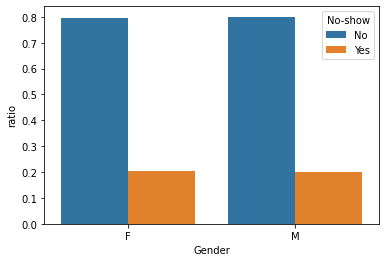

In [117]:
# 시각화하기
import seaborn as sns

sns.barplot(x='Gender', y='ratio', hue='No-show', data=gender_df)

- 여성이 남성보다 건강 염려하는 마음이 강해서 No-show 비율이 여성이 더 높을거라고 예상했지만 결과는 아니였다.
- No-show 건수의 절대적 숫자를 고려하지 않고 성별 전체적인 진료건수를 고려해 **비율**
로 계산함

- ``첫 번째 가설인 '여성이 남성보다 향후 진료에 더 참석율이 높을 것이다'는 기각``해야 한다. 남자과 여자 사이의 No-show 비율이 동일

## 두 번째 가설검정

- 향후 진료예약을 등록한 날(time)부터 진료예약 방문날까지 시간이 짧을수록 향후 진료에 참여율이 더 높을 것이다.

In [122]:
# 시계열 변수 아님 -> 따라서 x축에 date_diff를 놓으면 안됨
# No-show의 label별로 date_diff 값의 평균값을 출력해보자.
medical['date_diff'] = medical['date_diff'].astype(int)
date_diff_show = medical.groupby('No-show')['date_diff'].mean()
date_diff_show

No-show
No      8.754659
Yes    15.831489
Name: date_diff, dtype: float64

In [123]:
# No-show의 label별로 date_time값들의 히스토그램을 그려보자. => 이거하기!
no_show = medical[medical['No-show'] == 'No']
yes_show = medical[medical['No-show'] == 'Yes']
print('No label shape: ', no_show.shape)
print('Yes label shape: ', yes_show.shape)

No label shape:  (88208, 13)
Yes label shape:  (22319, 13)


- 'Yes' label 즉, 향후 진료를 받지 않은 사람들이 압도적으로 매우 숫자가 적음에도 불구하고 date_diff 평균값은 'Yes' label이 거의 2배가까이 값이 크다! 
    * 따라서, 우선 수치적으로만 보더라도 향후 진료를 받지 않는 사람들('Yes' labe)은 ``진료 예약을한 날로부터 진료방문날이 먼 미래일수록 No-show할 가능성이 큼``을 추론해볼 수 있다.